In [4]:
import pandas as pd
import numpy as np
import os
print(os.getcwd()) #当前工作目录

e:\实验1


- pd.read_csv() 读取csv
  - read_...读取不同类型文件
- mean()均值
- median()中位数
- my_data[my_data.stroke==1]:根据my_data里筛选stroke==1

In [ ]:
my_data = pd.read_csv("stroke.csv")
# stroke 文件必须先拷贝到当前工作目录中
stro_ple = my_data[my_data.stroke==1]#根据 stroke 特征值筛选出中风人群（stro_ple）
# print(stro_ple)
# stroke中文翻译是'中风'
print('中风患者年龄的位置性测度:')
stro_age = stro_ple.age#取出中风人群的年龄
print('均值：\t\t',stro_age.mean())
print('中位数：\t',stro_age.median())
print('第 25 百分位数：\t',stro_age.quantile(q=0.25))
# print(' ：\t\t',stro_age.mode()) #stro_age.mode()是一个Series，可能有多个众数
print('众数：\t\t',stro_age.mode().values[0])

中风患者年龄的位置性测度:
均值：		 67.72819277108434
中位数：	 71.0
第 25 百分位数：	 59.0
众数：		 0    78.0
Name: age, dtype: float64
众数：		 78.0


In [ ]:
print('对平均血糖水平的离散性测度统计结果：')
print('方差：\t\t',stro_ple[['avg_glucose_level']].var()[0])
print('标准差：\t',stro_ple[['avg_glucose_level']].std()[0])
print('变异系数：\t',
        stro_ple[['avg_glucose_level']].std()[0]/
        stro_ple[['avg_glucose_level']].mean()[0])#注意上面三行为一个整句，代码写在一行

对平均血糖水平的离散性测度统计结果：
方差：		 3834.217124225938
标准差：	 61.92105558068223
变异系数：	 0.467170979915848


array([[<Axes: title={'center': 'age'}>]], dtype=object)

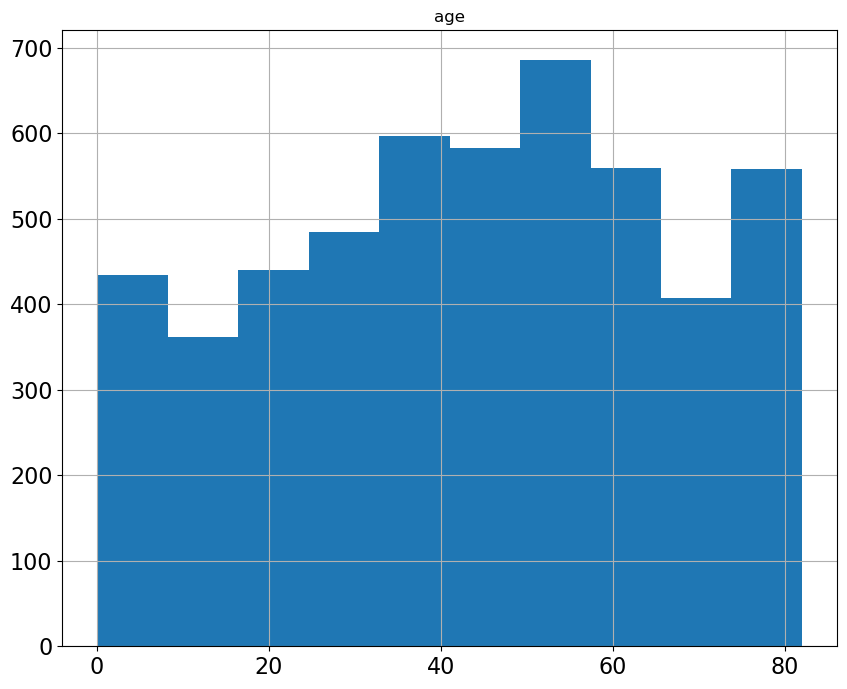

In [ ]:
# x轴、y 轴标注尺寸均为 16，图片大小为长 10，宽 8，分成 10 个区间
my_data[['age']].hist(bins=10, #区间个数
                      figsize=(10,8), #图片大小
                      xlabelsize=16, #尺寸
                      ylabelsize=16)

<Axes: >

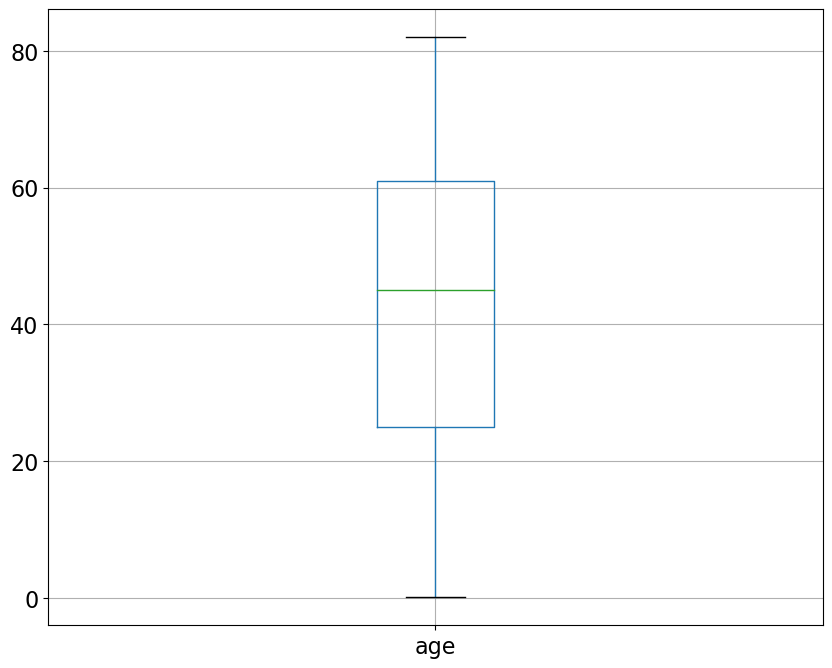

In [ ]:
#绘制箱型图
my_data[['age']].boxplot(figsize=(10,8),
                         fontsize=16)

heart_disease
0                202
1                 47
dtype: int64
<class 'pandas.core.series.Series'>


<Axes: xlabel='heart_disease'>

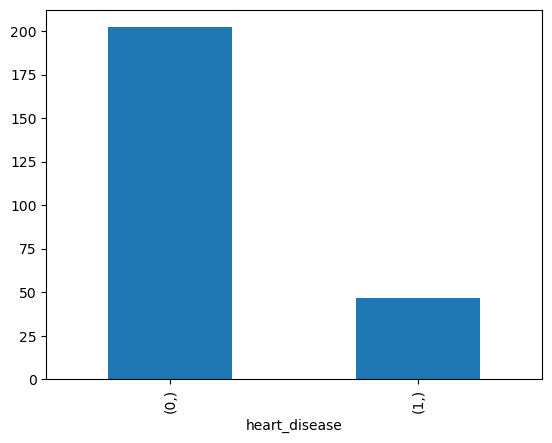

In [ ]:
#对heart_disease 进行分组
my_plot_data=stro_ple[['heart_disease']].value_counts()
# value_counts()计数
# 分组依据是 heart_disease 特征
print(my_plot_data)
# print(type(my_plot_data))
my_plot_data.plot(kind='bar')
#绘制柱状图

中风患者中是否患有心脏病的分组人数
heart_disease
0                202
1                 47
dtype: int64 

未中风患者中是否患有心脏病进行分组人数
heart_disease
0                4632
1                 229
dtype: int64 

               Stroke  Non_stroke
heart_disease                    
0                 202        4632
1                  47         229


<Axes: xlabel='heart_disease'>

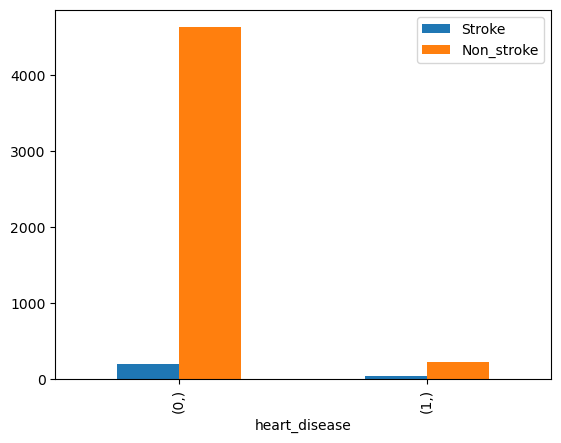

In [14]:
nstro_ple = my_data[my_data.stroke == 0]
# dataframe 中对于未中风患者（nstro_ple）的筛选

hd_stro = stro_ple[['heart_disease']].value_counts()
# 中风患者中是否患有心脏病的分组人数(hd_stro)
print('中风患者中是否患有心脏病的分组人数')
print(hd_stro, '\n')

hd_nostro = nstro_ple[['heart_disease']].value_counts()
# 未中风患者中是否患有心脏病进行分组人数（hd_nostro）
print('未中风患者中是否患有心脏病进行分组人数')
print(hd_nostro, '\n')

tol_data = pd.concat([hd_stro, hd_nostro], axis=1)
# 将两组分组数据进行连接

my_plot_data = tol_data.rename(columns={0: 'Stroke', 1: 'Non_stroke'})
# 将连接后的的数据列重命名

print(my_plot_data)
my_plot_data.plot(kind='bar')  # 绘制相应的条形图


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BloodPressure  733 non-null    float64
 1   BMI            757 non-null    float64
 2   Outcome        768 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 18.1 KB


<function matplotlib.pyplot.show(close=None, block=None)>

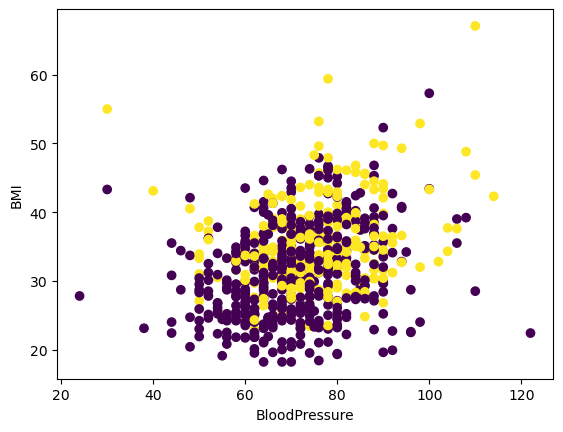

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
my_data1=pd.read_csv("diabetes.csv",usecols=['BloodPressure','BMI','Outcome']) #只读取这三列
my_data1.info() #查看数据的总记录数以及缺失情况
my_fil_data1=my_data1.dropna() #由于有缺失值的样本数量不多，所以丢弃这些样本
x1=my_fil_data1.BloodPressure #横坐标
y1=my_fil_data1.BMI #纵坐标
plt.scatter(x1,y1,c=my_fil_data1.Outcome) #根据 Outcome 给散点染色
plt.gca().set_xlabel('BloodPressure')
plt.gca().set_ylabel('BMI')
plt.show